Infi-flux License

Copyright (c) 2023 Infi-flux

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE AND HYPERLINKS LINKED TO EXTERNAL SITES PROOVIDED BELOW OR THE USE OR OTHER DEALINGS IN THE SOFTWARE AND HYPERLINKS LINKED TO EXTERNAL SITES PROOVIDED IN THIS DIALOGUE.

**Part 1**

Before we dive deep into basic core concepts of Risk management, we would like to address some basic necessary concepts. We are assuming investors manages multiple instruments of financial markets in a portfolio.

*   Weighted Average
*   Expected Return
*   Variance
*   CoVariance
*   Correlation
*   Variane Covariance matrix






1.   **Weighted average**: In the context of Investing, is a caluclation that takes into account the different weights, importance, proportion of various components in a portfolio. This metric is used when different instruments of the market have different levels of influence / contribution on the overall performance of the portfolio. We are interested in [weighted average Return](https://www.investopedia.com/terms/w/weightedaverage.asp).
WA RETURN = (w1*x1 + w2*x2 + ... (wn*xn)) / (w1 + w2+ ... + wn)
where w1,w2 .. are weights and x1,x2..... are returns from the respective instruments.

2.   [Expected return:](https://www.investopedia.com/terms/e/expectedreturn.asp) Is a key concept that is used to anticipate gain or loss on a investment, typically represented as percentage. Its an estimate of average return an investor can expect to receive from an investment over a specific period. In simple words , Expected return is **ESTIMATED** return. The notion of anticipation.
E(R) = (p1 * R1) + (p2 * R2) + ....(pn + Rn)
where p are the probabilities and R are the returns of the investment.

3. [Variance:](https://www.investopedia.com/ask/answers/021215/what-difference-between-standard-deviation-and-variance.asp) It is a statistical term that measures how much a set of data points (numbers) deviate from their average [mean] Value. In simple words, it tells us how spread out or dispersed the values in a dataset are from it's mean.
4. [Covariance:](https://www.investopedia.com/terms/c/covariance.asp)  It deals with the relationship between 2 sets of data. it measure its directional relationship of 2 assets how much they change together.
5. [Correlation:](https://www.investopedia.com/terms/c/correlation.asp) It is a measure that quantifies the degree to which 2 variables are associated // related to each other.It is standardized way of expressing the strength and direction of a linear relationship between 2 assets and are scaled between -1 to 1.



Retriving Data: Adjust parameters as per your requirement including tickers, start_date, end_date, and interval. You may need to change parameters in further section too. Please check the ticker symbol on Yfinance website for instruments you are interested in. You may find Indices, equity and other financial market data. Please visit [Yfinance](https://finance.yahoo.com/) for respective tickers.

[*********************100%%**********************]  6 of 6 completed


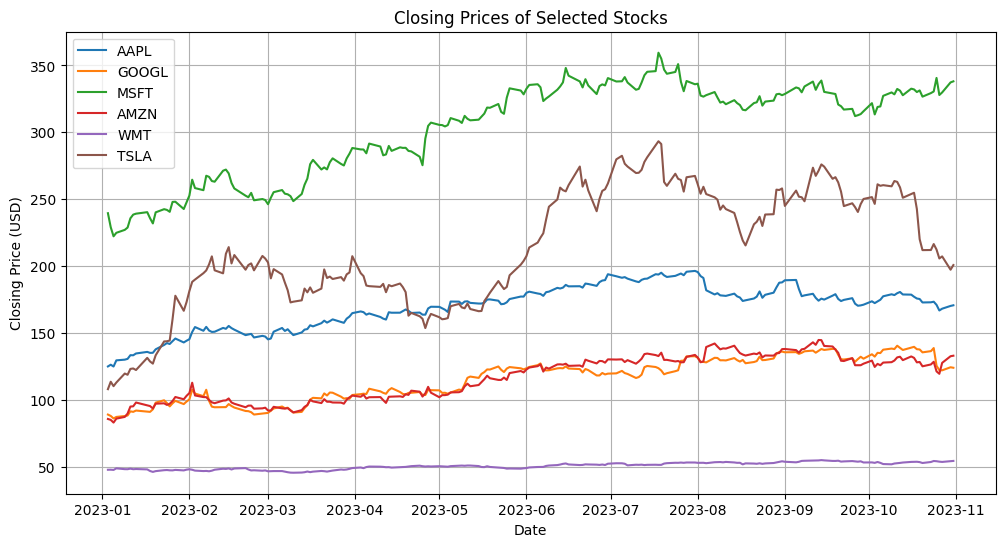

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import cvxpy as cp

def get_stock_data(tickers, start_date, end_date, interval):
    data = yf.download(tickers, start=start_date, end=end_date, interval = interval)
    return data

tickers =  ["AAPL", "GOOGL", "MSFT", "AMZN",  "WMT", "TSLA"]    # CHANGE as per your requirement
start_date = "2023-01-01"
end_date = "2023-11-01"
interval = '1d'

stock_data = get_stock_data(tickers, start_date, end_date, interval)
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(stock_data['Close'].index, stock_data['Close'][ticker], label=ticker)

plt.title('Closing Prices of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

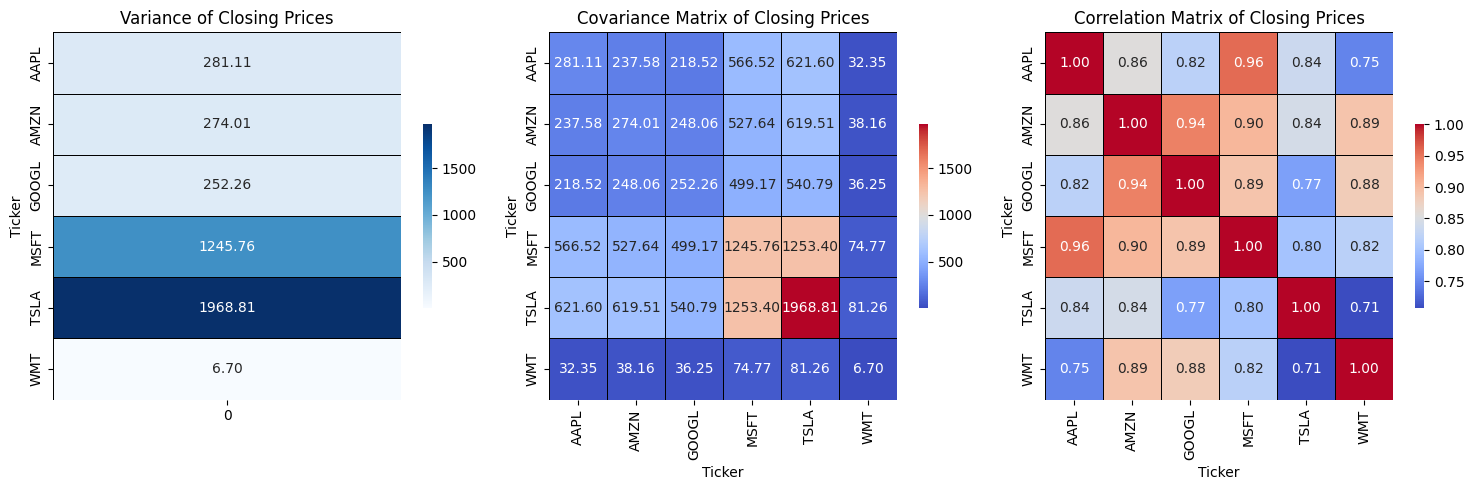

In [2]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

variance = stock_data['Close'].var()
covariance_matrix = stock_data['Close'].cov()
correlation_matrix = stock_data['Close'].corr()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(variance.to_frame(), annot=True, cmap="Blues", fmt=".2f", ax=axes[0], linewidths=.5, cbar_kws={"shrink": 0.5}, linecolor='black')
axes[0].set_title('Variance of Closing Prices')
sns.heatmap(covariance_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1], linewidths=.5, cbar_kws={"shrink": 0.5}, linecolor='black')
axes[1].set_title('Covariance Matrix of Closing Prices')
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[2], linewidths=.5, cbar_kws={"shrink": 0.5}, linecolor='black')
axes[2].set_title('Correlation Matrix of Closing Prices')
plt.tight_layout()
plt.show()

Insights from the above for what we have covered till now are as follows


*   [Risk Assessment:](https://www.investopedia.com/terms/r/riskaverse.asp) High Variance suggests greater price volatility, if an investor is a risk-averse
*   Variance will help us in building portfolio in further section
* Covariance will help us to identify stocks with negative covariance suggests diversification benefits. This helps to combine different assets in a portfolio reducing the overall risk.
* Risk Return Tradeoff: helps in constructing efficient portfolio as we will see in the coming section
* Market Trends

To simplify why these concepts are relatable in risk management. Is because this terms tells us how much an investment deviates from its mean. It give a degree of Volatility, uncertainity. After this, it's comparitive study depending on your risk Appetite. Also it give an idea of what is the direction of different instrument with each other are!. This helps to mitigate systematic and unsystematic risk. Please refer the Risk_management document on guide section of our website.

This concepts are the building blocks for build a portfolio that an investor hopes to mitigate certain risk likely faced by an investor.




//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

**Part 2 -> Portfolio Variance**

We will be calculating Portfolio Variance as a whole. How much it deviates from its mean. We have taken 6 stocks from above, so we randomly generate 6 numbers. 10%,20%,15%,25%,10%,20% and assign to ["AAPL", "GOOGL", "MSFT", "AMZN",  "WMT", "TSLA"] respectively.


In [3]:
returns = stock_data['Close'].pct_change()
weights = [0.1, 0.2, 0.15, 0.25, 0.1, 0.2]
covariance_matrix = returns.cov()
portfolio_variance = np.dot(np.dot(weights, covariance_matrix), weights)
print("Portfolio Variance:", portfolio_variance)

Portfolio Variance: 0.00016997129183268816


The Equity Curve: Growth or decline of a portfoio during a specific period of time.

Note: Cumulative return is the total percentage change in the portfolio's value from begining to the end of a specified time frame which is not equal to Portfolio Return. For equal weight for all instruments.

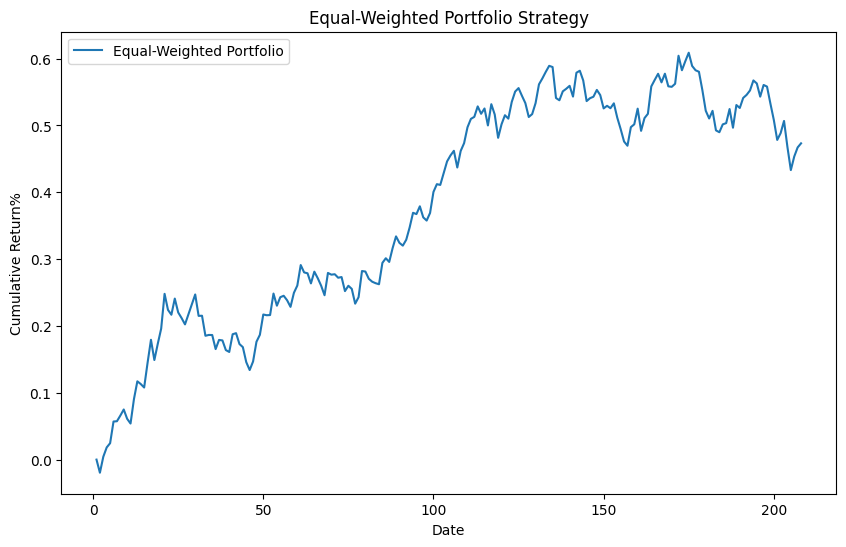

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
returns = stock_data['Close'].pct_change()
n_stocks = len(tickers)
weights = np.ones(n_stocks) / n_stocks
portfolio_returns = np.dot(returns, weights)
portfolio_returns = pd.Series(portfolio_returns).dropna()
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='Equal-Weighted Portfolio')
plt.title('Equal-Weighted Portfolio Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return%')
plt.legend()
plt.show()


**Part 3 -> Portfolio Optimization**

Before we begin, there are various types of Portfolio Optimization, and the reasons behind are different preferences, Risk Tolerances, investment Objectives and so on. This Portfolio Optimization is not a one size fit for all approaches. More reasons why there exist different type of portfolio optimization is Investors Objective, Risk Aversion Levels, Time Horizon, Constraints and Regulations, Return forecasting, market conditions, dynamic vs static strategies and so on.
Different types of Portfolio Optimization are:

1. Minimum Variance/volatility Portfolio
2. Maximum Return Portfolio
3. Fixed Variance, multiple portfolios
4. Markowitz Mean-Variance Optimization (MVO)
5. Black Litterman Model
6. Maximum Sharpe Ratio portfolio
7. Risk Parity Portfolio
8. Heuristc Optimization
9. Monte Carlo Simulation
10. Tactical Asset Allocation
11. Inverse-Volatility Weighting
12. Global Minimum Variance Portfolio
13. Equal Weighted Portfolios
14. Mean CVaR Optimization
15. Hirerachical Risk Parity
16. Equally Weighted Risk Contribution
17. Black-Scholes-Merton (BSM) portfolio Optimization
18. Dynamic Conditional Correlation Model
19. Leverage-Limited Portfolio Optimization.
20. Robust Portfolio Optimization
21. Entropy Based Optimization
22. Bayesian Portfolio Optimization
23. Machine Learning Based Optimization
24. Multi-Objective Optimization
25. Factor Based Portfolio Optimization
26. Regime-Based Portfolio Allocation
27. Scenerio Analysis
28. Mean-Lower Partial Moment Optimization
29. Drawndown-Based Optimization
30. Risk Budgeting
31. Resampled Efficiency Optimization
32. Portfolio Completion Strategies
33. Simultaneous Long-Short Optimization
34. Bayesian Networks in portfolio Construction
35. Economic Scenerio Generator Optimization
36. Efficient Frontier
37. Capital Market Line
38. Risk Return Tradeoff

And the list goes on and on and on. Basically each Optimization types caters to what the investors want in the end and also what type of Risk investors is most likey to face. You can come up with your own version that may cater to your requirements for mitigating systematic and unsystematic risk. For demonstration purposes, we will do the high return and minimum variance one below.



**Maximum Return Optimization**: Gives answer to question how much to invest in what to get the maximum possible return based on previous data.

[*********************100%%**********************]  6 of 6 completed


       Optimal Weights
AAPL      4.326307e-07
GOOGL     6.990964e-08
MSFT      4.123311e-07
AMZN      4.121244e-07
WMT       9.999983e-01
TSLA      3.792158e-07

Optimal Portfolio:
Expected Return: 0.0035698955740495835
Volatility: [[0.03446002]]


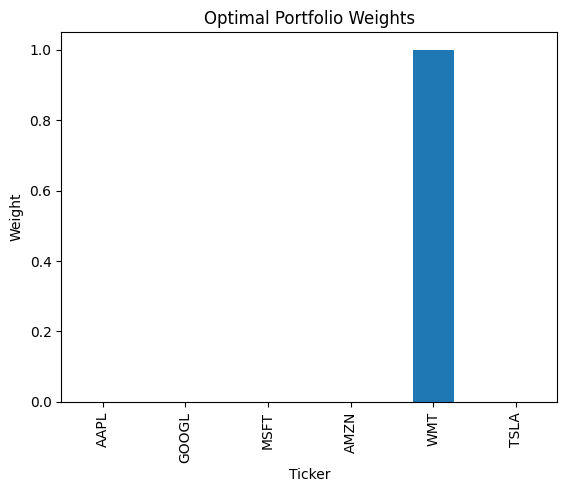

In [5]:
# Maximum Return Optimization / Generate by Ai models by asking simple line of questioning
import yfinance as yf
import matplotlib.pyplot as plt
import cvxpy as cp

def get_stock_data(tickers, start_date, end_date, interval):
    data = yf.download(tickers, start=start_date, end=end_date, interval = interval)
    return data

tickers =  ["AAPL", "GOOGL", "MSFT", "AMZN",  "WMT", "TSLA"]   # change as per your requirement
start_date = "2023-01-01"
end_date = "2023-11-01"
interval = '1d'

stock_data = get_stock_data(tickers, start_date, end_date, interval)

returns = stock_data['Close'].pct_change().dropna()

# Expected returns (mean returns)
mu = returns.mean().values

# Covariance matrix
Sigma = returns.cov()

# Number of assets
n_assets = len(tickers)

# Define the optimization variables
weights = cp.Variable((n_assets, 1))

# Objective function: maximize expected portfolio return
objective = cp.Maximize(mu @ weights[:, 0])

# Constraints:
# - Weights sum to 1
# - Non-negativity of weights
constraints = [cp.sum(weights) == 1, weights >= 0]

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Extract the optimized weights
optimal_weights = weights.value

# Display the optimized weights
optimal_weights_df = pd.DataFrame(optimal_weights, index=tickers, columns=["Optimal Weights"])
print(optimal_weights_df)

# Calculate the expected return and volatility of the optimized portfolio
expected_return = mu @ optimal_weights[:, 0]
portfolio_volatility = cp.sqrt(weights.T @ Sigma @ weights).value

print("\nOptimal Portfolio:")
print("Expected Return:", expected_return)
print("Volatility:", portfolio_volatility)

# Plot the optimized portfolio weights
optimal_weights_df.plot(kind='bar', legend=None)
plt.title("Optimal Portfolio Weights")
plt.xlabel("Ticker")
plt.ylabel("Weight")
plt.show()

**Minimum Variance Optimization**

[*********************100%%**********************]  6 of 6 completed


       Optimal Weights
AAPL      1.839878e-01
GOOGL     8.697753e-19
MSFT      3.176792e-18
AMZN      7.444227e-02
WMT       6.752597e-18
TSLA      7.415699e-01

Minimum Variance Portfolio:
Volatility: [[0.00767409]]


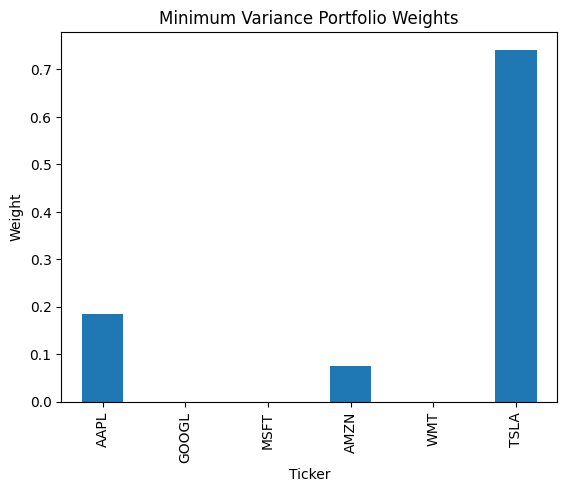

In [6]:
import yfinance as yf
import matplotlib.pyplot as plt
import cvxpy as cp

def get_stock_data(tickers, start_date, end_date, interval):
    data = yf.download(tickers, start=start_date, end=end_date, interval = interval)
    return data

tickers =  ["AAPL", "GOOGL", "MSFT", "AMZN",  "WMT", "TSLA"]   # CHANGE as per your requirement
start_date = "2023-01-01"
end_date = "2023-11-01"
interval = '1d'

stock_data = get_stock_data(tickers, start_date, end_date, interval)

returns = stock_data['Close'].pct_change().dropna()

# Covariance matrix
Sigma = returns.cov()

# Number of assets
n_assets = len(tickers)

# Define the optimization variable
weights = cp.Variable((n_assets, 1))

# Objective function: minimize portfolio volatility
objective = cp.Minimize(cp.quad_form(weights, Sigma))

# Constraints:
# - Weights sum to 1
# - Non-negativity of weights
constraints = [cp.sum(weights) == 1, weights >= 0]

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Extract the optimized weights
optimal_weights = weights.value

# Display the optimized weights
optimal_weights_df = pd.DataFrame(optimal_weights, index=tickers, columns=["Optimal Weights"])
print(optimal_weights_df)

# Calculate the expected return and volatility of the optimized portfolio
portfolio_volatility = cp.sqrt(weights.T @ Sigma @ weights).value

print("\nMinimum Variance Portfolio:")
print("Volatility:", portfolio_volatility)

# Plot the optimized portfolio weights
optimal_weights_df.plot(kind='bar', legend=None)
plt.title("Minimum Variance Portfolio Weights")
plt.xlabel("Ticker")
plt.ylabel("Weight")
plt.show()

Similarly you can achieve various portfolio optimization approaches that deals with different risks systematic and unsystematic alike. One Suggestion, if required any assistance with coding in any language like python. Please use a GPT model like Chat-Gpt or bard. If any error encountered. Copy paste the error displayed by the colab notebook. If Errors still persist. Then use the copy of the above code and tell prompt to use as reference.

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

**Position Sizing**
It involves determining the amount of capital or the percentage of a portfolio that will be allocated to a specific Investment or trade. Position sizing considers the following


*   Risk Tolerance
*   Portfolio Diversification
*   Volatility of the Asset
*   Correlation
*   Liquidity

Different methods of Position Sizing involves


1. Fixed Dollar amount
2. Fixed percentage of the Capital
3. Risk Parity
4. Kelly Criterion
5. Volatility Based Sizing
6. Risk Adjusted
7. Equal Risk Contribution
8. Fixed Ratio Position Sizing
9. Monte Carlo Simulations.

We have briefly discussed Kelly Criterion in Position-sizing notebook that is stated in the third phase of Generic basic Investment Architecture called as Story Tools Documents under Guide section of Infi-flux. One point to focus on is the Distribution of that fraction of the capital to be invested in a Portfolio. Meaning generally , the fraction is divided as per the composition of the portfolio that we have constructed from the above or you came up with.

Thank you, This was the basic Risk Management concepts that were available in the [public - Zerodha Varsity](https://zerodha-common.s3.ap-south-1.amazonaws.com/Varsity/Modules/Module%209_Risk%20Management%20%26%20Trading%20Psychology.pdf) domain and free gpt models. We will add and improve the current Free content on our website and continue building CFII [Centralized Finance Information Index] in the guide section. Please Suscribe to our Newsletters, for latest updates on our innovative products and Free Study Material like one above helping you in understand basic concepts that may bring you one step closer in understanding Financial Markets which may enable you as an investor to survive and grow in Financial Markets.

Thank you Once again.

Hope this Helps.

By Infi-flux